In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn
import seaborn as sns

In [2]:
spam = pd.read_csv("spambase.dat", header=None, delim_whitespace=True)

In [3]:
spam 

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
spam.shape

(4601, 58)

In [5]:
n = spam.shape[0]
p = spam.shape[1] - 1

In [6]:
spam.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [7]:
spam.rename(columns={57: 'class'}, inplace=True)

In [8]:
spam

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [9]:
spam['class']

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

In [10]:
spam[56]

0        278
1       1028
2       2259
3        191
4        191
        ... 
4596      88
4597      14
4598     118
4599      78
4600      40
Name: 56, Length: 4601, dtype: int64

In [12]:
corr = spam.corr()
corr['class']

0        0.126208
1       -0.030224
2        0.196988
3        0.057371
4        0.241920
5        0.232604
6        0.332117
7        0.206808
8        0.231551
9        0.138962
10       0.234529
11       0.007741
12       0.132927
13       0.060027
14       0.195902
15       0.263215
16       0.263204
17       0.204208
18       0.273651
19       0.189761
20       0.383234
21       0.091860
22       0.334787
23       0.216111
24      -0.256723
25      -0.232968
26      -0.183404
27      -0.158800
28      -0.133523
29      -0.171095
30      -0.126912
31      -0.114214
32      -0.119931
33      -0.112754
34      -0.149225
35      -0.136134
36      -0.178045
37      -0.031035
38      -0.122831
39      -0.064801
40      -0.097375
41      -0.136615
42      -0.135664
43      -0.094594
44      -0.140408
45      -0.146138
46      -0.044679
47      -0.084020
48      -0.059630
49      -0.089672
50      -0.064709
51       0.241888
52       0.323629
53       0.065067
54       0.109999
55       0

In [11]:
X = spam.drop('class', axis=1) 
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [12]:
y = spam["class"]
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
3560,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.237,0.000,0.000,0.000,0.000,1.800,9,36
2589,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.120,0.000,0.241,0.000,0.000,3.541,26,85
3062,0.17,0.00,0.35,0.0,0.53,0.00,0.0,0.35,0.0,0.00,...,0.0,0.071,0.143,0.000,0.000,0.000,0.000,2.464,80,244
4435,0.00,0.00,0.59,0.0,0.00,0.00,0.0,0.00,0.0,0.29,...,0.0,0.039,0.235,0.000,0.471,0.000,0.039,3.659,70,333
3083,0.00,14.28,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.800,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.122,0.081,0.000,0.000,0.040,3.891,70,323
466,0.00,0.23,0.00,0.0,0.23,0.47,0.0,0.47,0.0,0.95,...,0.0,0.000,0.121,0.040,0.000,0.040,0.000,3.780,55,189
3092,0.00,0.00,0.00,0.0,1.49,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.229,0.000,0.000,0.000,0.000,2.333,10,49
3772,0.00,0.23,0.00,0.0,0.00,0.23,0.0,0.46,0.0,0.00,...,0.0,0.063,0.063,0.000,0.159,0.000,0.000,1.616,13,173


In [16]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
3683,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3
4412,0.71,0.00,0.71,0.0,0.00,0.0,0.00,0.00,0.0,0.71,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.032,2,32
2584,0.00,0.00,0.91,0.0,0.00,0.0,0.00,0.45,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.320,7,103
69,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.201,0.000,0.000,0.100,0.000,4.548,59,141
1844,0.00,0.00,0.54,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.188,0.047,0.000,0.000,0.000,1.745,12,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0.00,1.96,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,3.129,17,97
4235,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.478,0.000,0.000,0.000,0.000,1.333,4,28
660,0.00,0.00,0.00,0.0,0.00,0.0,1.04,0.00,0.0,0.00,...,0.0,0.062,0.248,0.000,0.621,0.062,0.062,3.902,59,160
2741,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3


In [17]:
y_train

3560    0
2589    0
3062    0
4435    0
3083    0
       ..
4426    0
466     1
3092    0
3772    0
860     1
Name: class, Length: 3082, dtype: int64

In [18]:
y_test

3683    0
4412    0
2584    0
69      1
1844    0
       ..
2535    0
4235    0
660     1
2741    0
4352    0
Name: class, Length: 1519, dtype: int64

In [19]:
i = 3

<AxesSubplot:title={'center':'3'}, xlabel='[class]'>

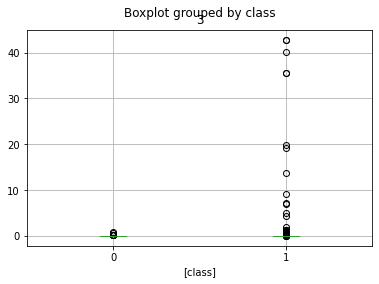

In [20]:
fig, ax = plt.subplots()

spam.boxplot(column=[i], by=['class'], ax = ax)

<AxesSubplot:xlabel='[3]', ylabel='[class]'>

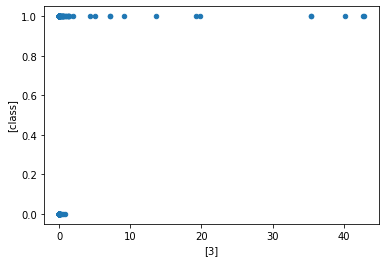

In [21]:
fig, ax = plt.subplots()

spam.plot.scatter(x=[i], y=['class'], ax = ax)

In [22]:
i += 1

Text(0.5, 0, 'V4')

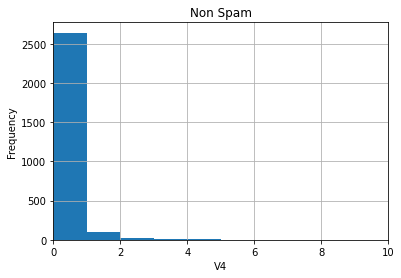

In [23]:
fig, ax = plt.subplots()
spam.loc[spam['class']==0,i].hist(ax=ax)
plt.xlim(xmin=0, xmax=10)
plt.title('Non Spam')
plt.ylabel('Frequency')
plt.xlabel('V' + str(i))

Text(0.5, 0, 'V4')

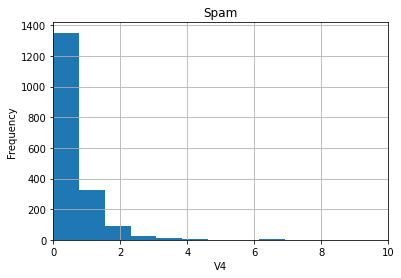

In [24]:
fig, ax = plt.subplots()
spam.loc[spam['class']==1,i].hist(ax=ax)
plt.xlim(xmin=0, xmax=10)
plt.title('Spam')
plt.ylabel('Frequency')
plt.xlabel('V' + str(i))

In [25]:
spam[4].describe()

count    4601.000000
mean        0.312223
std         0.672513
min         0.000000
25%         0.000000
50%         0.000000
75%         0.380000
max        10.000000
Name: 4, dtype: float64

In [26]:
# Q3

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [28]:
lda_spam = LDA()

In [29]:
lda_spam.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
lda_spam.__dict__

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': None,
 'store_covariance': False,
 'tol': 0.0001,
 'n_features_in_': 57,
 'classes_': array([0, 1], dtype=int64),
 'priors_': array([0.61713173, 0.38286827]),
 '_max_components': 1,
 'means_': array([[7.36750789e-02, 2.22181914e-01, 2.04447950e-01, 6.51945321e-04,
         1.81219769e-01, 4.35909569e-02, 9.30599369e-03, 3.68664564e-02,
         3.38538381e-02, 1.67854890e-01, 2.28654048e-02, 5.25862250e-01,
         6.29127234e-02, 4.09043113e-02, 6.06729758e-03, 7.30757098e-02,
         4.66666667e-02, 8.93848580e-02, 1.27075710e+00, 7.68664564e-03,
         4.25262881e-01, 4.27444795e-02, 6.92954784e-03, 2.10199790e-02,
         8.54905363e-01, 3.79263933e-01, 1.24675079e+00, 1.87712934e-01,
         1.44658254e-01, 1.56093586e-01, 9.38117771e-02, 6.81861199e-02,
         1.49437434e-01, 6.88222923e-02, 1.64200841e-01, 1.34837014e-01,
         2.08217666e-01, 1.94479495e-02, 1.32502629e-01, 7.27339642e-02,
      

In [31]:
y_pred = lda_spam.predict(X_test)

In [32]:
lda_spam.score(X_test, y_test)

0.8854509545753786

In [33]:
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(perf)

[[845  41]
 [133 500]]


In [34]:
1 - sum(np.diag(perf)) / float(len(y_test)) # error rate

0.11454904542462141

In [35]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8854509545753786

In [36]:
# Q4

In [37]:
# reference:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

In [38]:
probs = lda_spam.predict_proba(X_test)
probs

array([[0.94834761, 0.05165239],
       [0.92284344, 0.07715656],
       [0.91531035, 0.08468965],
       ...,
       [0.15168714, 0.84831286],
       [0.99883637, 0.00116363],
       [0.12505822, 0.87494178]])

In [39]:
preds = probs[:,1]
preds

array([0.05165239, 0.07715656, 0.08468965, ..., 0.84831286, 0.00116363,
       0.87494178])

In [40]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds)
roc_auc = sklearn.metrics.auc(fpr, tpr)

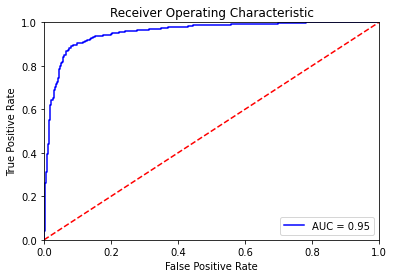

In [41]:
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
# Q5

In [43]:
Kmax = 20
err = np.zeros(Kmax)

In [44]:
err

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [45]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(Kmax):
    knn_classifier = KNeighborsClassifier(n_neighbors=k+1)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    err[k] = np.mean(y_test != y_pred)
print(err)

[0.20078999 0.23765635 0.21922317 0.23831468 0.21263989 0.23502304
 0.23041475 0.23831468 0.22843976 0.23502304 0.23370639 0.24621461
 0.2363397  0.23963134 0.23699803 0.24226465 0.24423963 0.25148124
 0.24489796 0.25148124]


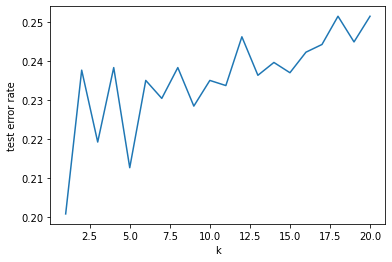

In [46]:
fig, ax = plt.subplots()
plt.plot(range(1, Kmax+1), err)
plt.ylabel("test error rate")
plt.xlabel('k')
plt.show()

In [47]:
#----- Part II

In [48]:
mu1 = [0, 1]
mu2 = [0, 2]
mu3 = [2, 0]
Sigma = [[1, 0.5], [0.5, 2]]
p1 = 0.3
p2 = 0.3
p3 = 1- p1 - p2

In [49]:
def gen_data(N, mu1, mu2, mu3, Sigma1, Sigma2, Sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, Sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, Sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, Sigma3, N3)
    return dict({'X':X, 'y':y})

In [50]:
test = gen_data(10000,mu1,mu2,mu3,Sigma,Sigma,Sigma,p1,p2)

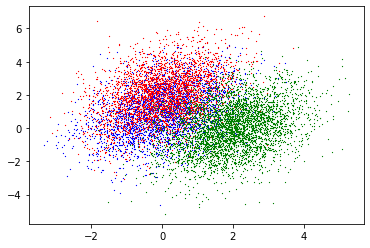

In [51]:
plt.scatter(test['X'][test['y']==1, 0], test['X'][test['y']==1, 1], c='blue', marker='>', s=0.1)
plt.scatter(test['X'][test['y']==2, 0], test['X'][test['y']==2, 1], c='red', marker='<', s=0.1)
plt.scatter(test['X'][test['y']==3, 0], test['X'][test['y']==3, 1], c='g', marker='^', s=0.1)

In [52]:
from scipy.stats import multivariate_normal

In [53]:
pdf1 = p1 * multivariate_normal.pdf(test['X'], mu1, Sigma)
pdf2 = p2 * multivariate_normal.pdf(test['X'], mu2, Sigma)
pdf3 = p3 * multivariate_normal.pdf(test['X'], mu3, Sigma)

In [54]:
g = np.vstack((pdf1, pdf2, pdf3)).T
g

array([[3.53154915e-02, 2.98117901e-02, 1.21475098e-03],
       [5.94139200e-04, 5.73303045e-05, 1.29755248e-02],
       [4.74828836e-03, 4.99570335e-03, 7.08645620e-03],
       ...,
       [7.61012145e-06, 6.57488789e-07, 1.22511340e-02],
       [5.76559188e-03, 6.90484139e-03, 4.91068282e-03],
       [2.22120570e-03, 1.33272520e-03, 1.85114476e-06]])

In [55]:
y_pred = 1 + np.argmax(g, axis=1)

In [56]:
y_pred == test['y']

array([ True,  True,  True, ...,  True, False, False])

In [57]:
np.unique(test['y'])

array([1, 2, 3])

In [58]:
np.unique(y_pred)

array([1, 2, 3], dtype=int64)

In [59]:
sklearn.metrics.confusion_matrix(test['y'], y_pred)

array([[1561, 1034,  373],
       [ 951, 1940,  155],
       [ 293,   82, 3611]], dtype=int64)

In [60]:
errb = np.mean(y_pred != test['y'])
errb

0.2888

In [61]:
# Q2 (LDA)

In [62]:
train = gen_data(50,mu1,mu2,mu3,Sigma,Sigma,Sigma,p1,p2)

In [63]:
lda = LDA()

In [64]:
lda.fit(train['X'], train['y'])

LinearDiscriminantAnalysis()

In [65]:
y_pred = lda.predict(test['X'])

In [66]:
err_lda = np.mean(y_pred != test['y'])
err_lda

0.2994

In [67]:
print(errb, err_lda)

0.2888 0.2994
